In [34]:
import pandas as pd 

In [35]:
pt_1=pd.read_csv('first_solar_point.csv',skiprows=21)

In [41]:
pt_seattle=pd.read_csv('Seattle.csv', skiprows=14)

In [36]:
pt_1.head()

,LAT,LON,YEAR,MO,DY,PRECTOT,PS,QV2M,T2M_RANGE,TS,T2MDEW,T2M,WS50M,WS10M,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN
0,47.39291,-124.31319,1981,1,1,0.09,100.62,0.005916,4.18,7.71,6.25,7.63,4.77,3.43,-999.0,-999.0,-999.0
1,47.39291,-124.31319,1981,1,2,0.05,100.53,0.005588,4.92,7.57,5.40,7.28,6.60,4.86,-999.0,-999.0,-999.0
2,47.39291,-124.31319,1981,1,3,0.22,100.78,0.005119,3.78,7.12,4.14,6.70,5.34,4.04,-999.0,-999.0,-999.0
3,47.39291,-124.31319,1981,1,4,0.14,101.39,0.005621,3.20,7.81,5.61,7.98,3.43,2.58,-999.0,-999.0,-999.0
4,47.39291,-124.31319,1981,1,5,0.30,101.01,0.005540,4.09,7.64,5.35,7.48,5.25,3.81,-999.0,-999.0,-999.0


In [13]:
#pt_1.columns=pt_1.iloc[0].values

In [37]:
pt_1.YEAR.astype('str')
pt_1.MO.astype('str')
pt_1.DY.astype('str')
pt_1['Date']=pt_1.YEAR.astype('str')+'/'+pt_1.MO.astype('str')+'/'+pt_1.DY.astype('str')
pt_1.columns

Index(['LAT', 'LON', 'YEAR', 'MO', 'DY', 'PRECTOT', 'PS', 'QV2M', 'T2M_RANGE',
       'TS', 'T2MDEW', 'T2M', 'WS50M', 'WS10M', 'ALLSKY_SFC_LW_DWN',
       'ALLSKY_SFC_SW_DWN', 'CLRSKY_SFC_SW_DWN', 'Date'],
      dtype='object')

In [38]:
pt_1['Date']=pd.to_datetime(pt_1['Date'])

In [39]:
pt_1['Date'].asfreq('D')

1970-01-01   NaT
Freq: D, Name: Date, dtype: datetime64[ns]

#pt_1['Date']==pd.date_range('1981-01-01','1983-06-30')

In [9]:
pt_1['Date']

0       1981-01-01
1       1981-01-02
2       1981-01-03
3       1981-01-04
4       1981-01-05
           ...    
14353   2020-04-19
14354   2020-04-20
14355   2020-04-21
14356   2020-04-22
14357   2020-04-23
Name: Date, Length: 14358, dtype: datetime64[ns]

In [50]:
#pt_1.sort_values('Date').Date.tail(50)

In [16]:
pt_1_timeseries=pt_1[['Date','ALLSKY_SFC_LW_DWN']]

In [17]:
pt_1_timeseries.isna().sum()

Date                 0
ALLSKY_SFC_LW_DWN    0
dtype: int64

In [18]:
pt_1_timeseries.ALLSKY_SFC_LW_DWN.value_counts()

-999.00    919
 7.65      107
 7.44      105
 7.83       99
 7.91       97
          ... 
 5.59        1
 5.55        1
 5.71        1
 5.37        1
 5.09        1
Name: ALLSKY_SFC_LW_DWN, Length: 398, dtype: int64

In [19]:
pt_1_timeseries.tail()

,Date,ALLSKY_SFC_LW_DWN
14353,2020-04-19,-999.0
14354,2020-04-20,-999.0
14355,2020-04-21,-999.0
14356,2020-04-22,-999.0
14357,2020-04-23,-999.0


In [20]:
pt_1_timeseries.set_index('Date',inplace=True)

In [11]:
pt_1_timeseries_month=pt_1_timeseries.resample('MS')

In [12]:
#down_sampling
pt_1_timeseries_month_mean=pt_1_timeseries.resample('MS').mean()

In [21]:
pt_1_timeseries.loc[pt_1_timeseries['ALLSKY_SFC_LW_DWN']==-999,:]

,ALLSKY_SFC_LW_DWN
Date,
1981-01-01,-999.0
1981-01-02,-999.0
1981-01-03,-999.0
1981-01-04,-999.0
1981-01-05,-999.0
...,...
2020-04-19,-999.0
2020-04-20,-999.0
2020-04-21,-999.0


In [22]:
import numpy as np
pt_1_timeseries.loc[pt_1_timeseries['ALLSKY_SFC_LW_DWN']==-999,:]= np.nan

/Users/yasserelhari/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/yasserelhari/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
pt_1_timeseries.ALLSKY_SFC_LW_DWN.value_counts(dropna= False)

NaN     919
7.65    107
7.44    105
7.83     99
7.91     97
       ... 
9.34      1
5.29      1
5.71      1
5.53      1
5.34      1
Name: ALLSKY_SFC_LW_DWN, Length: 398, dtype: int64

In [25]:
pt_1_timeseries.shape

(14358, 1)

In [27]:
pt_1_timeseries.bfill(inplace=True)

/Users/yasserelhari/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


pd.Series(pt_1_timeseries.index== pd.date_range('1983-07-01','2020-04-16')).value_counts()

In [17]:
pt_1_timeseries[pt_1_timeseries['ALLSKY_SFC_LW_DWN']==8.49].head(914)

,ALLSKY_SFC_LW_DWN
Date,
1981-01-01,8.49
1981-01-02,8.49
1981-01-03,8.49
1981-01-04,8.49
1981-01-05,8.49
...,...
1983-06-29,8.49
1983-06-30,8.49
1983-07-01,8.49


In [22]:
pt_1_timeseries.tail()

,ALLSKY_SFC_LW_DWN
Date,
2020-04-12,5.89
2020-04-13,6.28
2020-04-14,7.78
2020-04-15,7.77
2020-04-16,7.08


In [28]:
pt_1_timeseries.ffill(inplace=True)

In [29]:
pt_1_timeseries.drop(pd.date_range('1981-01-01','1983-06-30'),inplace=True)

/Users/yasserelhari/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [30]:
pt_1_timeseries.drop(pd.date_range('2020-04-17','2020-04-23'),inplace=True)

In [31]:
pt_1_timeseries.isna().sum()

ALLSKY_SFC_LW_DWN    0
dtype: int64

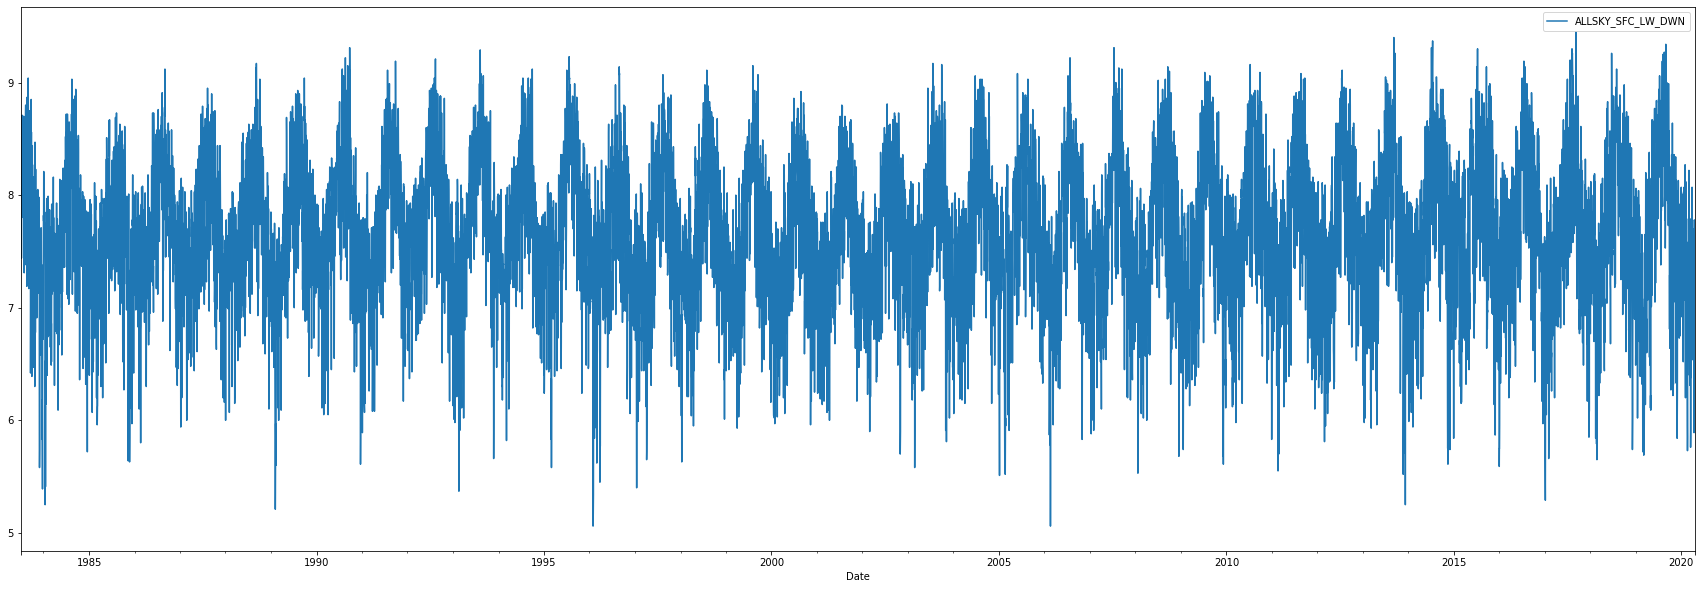

In [32]:
#visualizingtimeseriesdata
import matplotlib.pyplot as plt
%matplotlib inline
pt_1_timeseries.plot(figsize=(30,10))
#pt_1_timeseries.index

In [20]:
pt_1_timeseries_clean.values

array([[8.49],
       [8.15],
       [8.33],
       ...,
       [7.78],
       [7.77],
       [7.08]])

In [ ]:
#ts_log = pd.DataFrame(data=pt_1_timeseries.values, index=pd.date_range(start=datetime('1983-01,07'), end = datetime('2020,04,16'), freq='D'), columns=['radiation'])

In [33]:
pt_1_timeseries.asfreq('D')

,ALLSKY_SFC_LW_DWN
Date,
1983-07-01,8.49
1983-07-02,8.15
1983-07-03,8.33
1983-07-04,8.34
1983-07-05,8.03
...,...
2020-04-12,5.89
2020-04-13,6.28
2020-04-14,7.78


In [24]:
# Import and apply seasonal_decompose()
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(pt_1_timeseries)

In [25]:
# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(pt_1_timeseries), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

NameError: name 'plt' is not defined

In [119]:
pt_1_timeseries.mean()

ALLSKY_SFC_LW_DWN    7.049062
dtype: float64

pt_1_timeseries.shape
pt_1_timeseries[64:].index=list(pd.date_range('2015-05-03', '2016-10-03'))

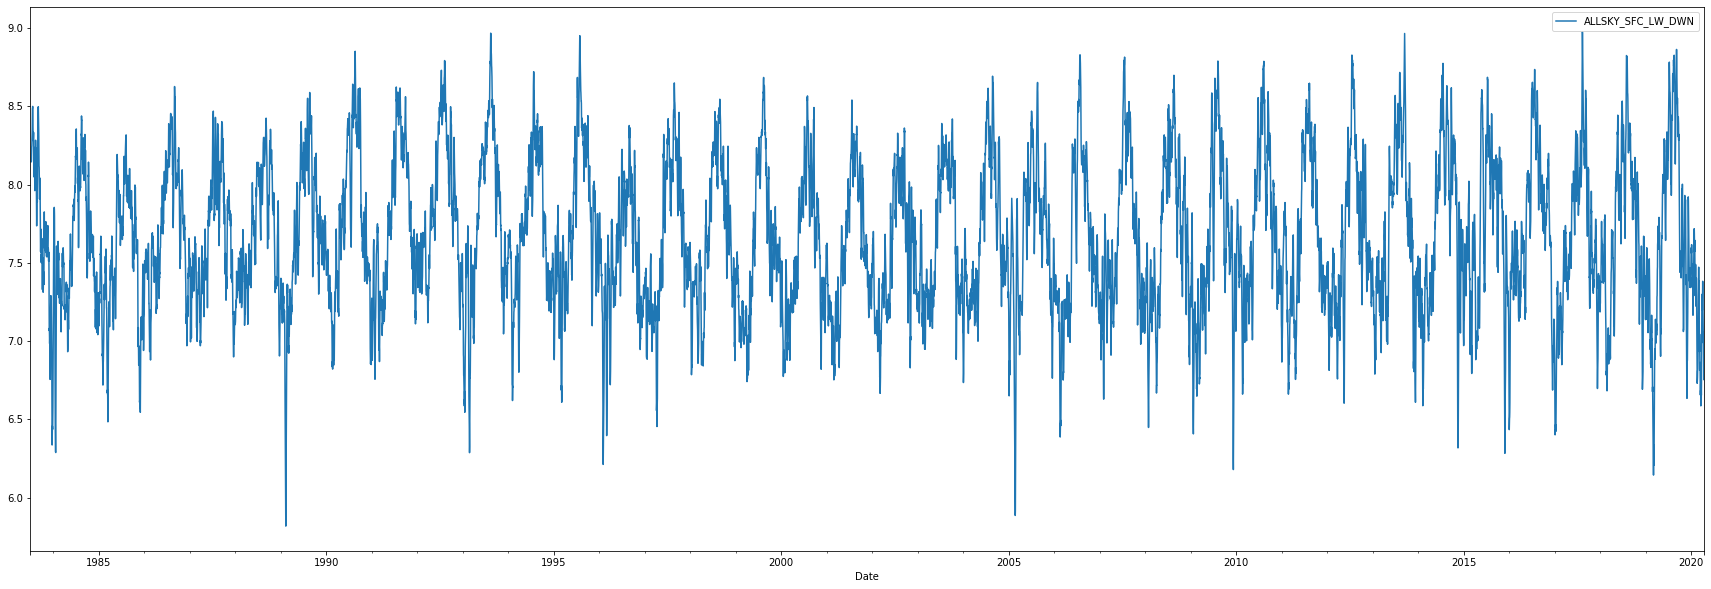

In [41]:
pt_1_timeseries.rolling(window=10,center=False).mean().plot(figsize=(30,10))

In [ ]:
The mean is changing over time we confirm that the timeseries is not stationnary 

In [32]:
#the dicker fuller test 
from statsmodels.tsa.stattools import adfuller

In [39]:
pt_1_timeseries[0:5]

,ALLSKY_SFC_LW_DWN
Date,
2015-01-01,5.15
2015-02-01,5.38
2015-03-01,5.69
2015-04-01,6.30
2015-05-01,6.54


In [41]:
import statsmodels.tsa.stattools
statsmodels.tsa.stattools.adfuller(pt_1_timeseries['ALLSKY_SFC_LW_DWN'])

(-8.929660399835244,
 9.893777490235198e-15,
 29,
 13410,
 {'1%': -3.430837736927229,
  '5%': -2.861755556745502,
  '10%': -2.566884735978415},
 17051.36091570739)

In [ ]:
The P-value so our time series is stationary.

Although Time series modeling require stationarity assumption only few practical times series are stationry. We will try to make a times series stationary even if in reality it is really hard to get a ts perfectly stationary

In [ ]:
here are two major reasons behind non-stationarity of a time series:
Trend: Varying mean over time
Seasonality: Certain variations at specific time-frames

In [ ]:
#modeling the trend and seasonality
Log Transformation: the advantage of taking a log transformation is that the higher values got more penalised than the lower ones.

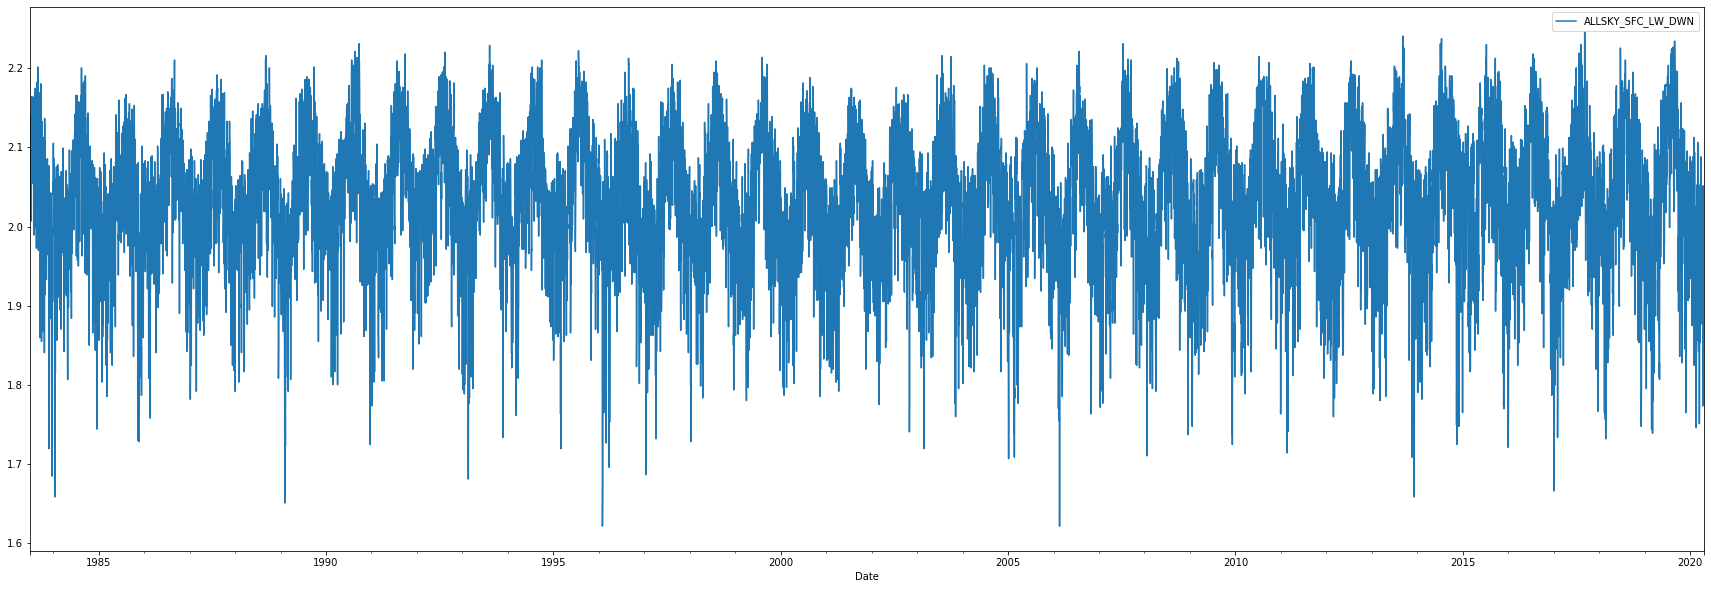

In [147]:
import numpy as np
np.log(pt_1_timeseries).plot(figsize=(30,10))


In [48]:
#subtracting the rolling mean 
roll_mean=pt_1_timeseries.rolling(window=10).mean()

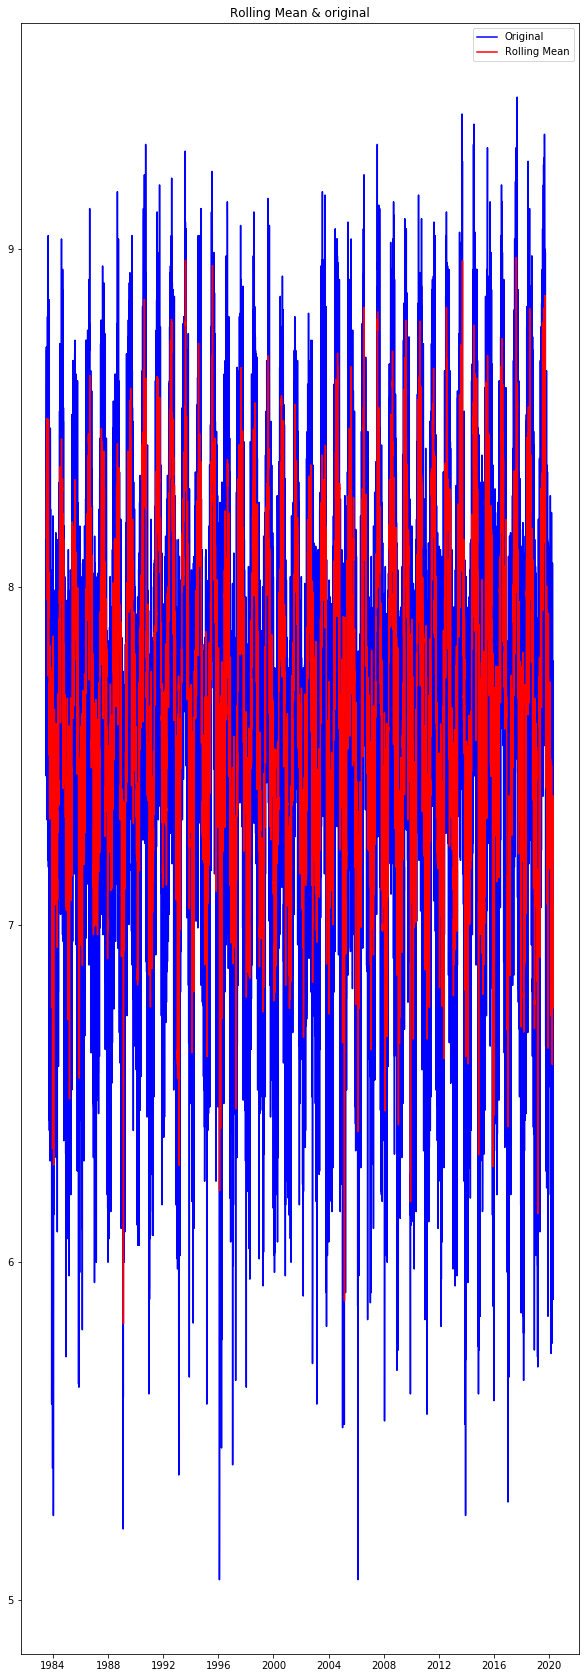

In [49]:
fig = plt.figure(figsize=(10,30))
plt.plot(pt_1_timeseries, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.legend()
plt.title('Rolling Mean & original')
plt.show(block=False)

In [48]:
data_minus_roll_mean = pt_1_timeseries - roll_mean

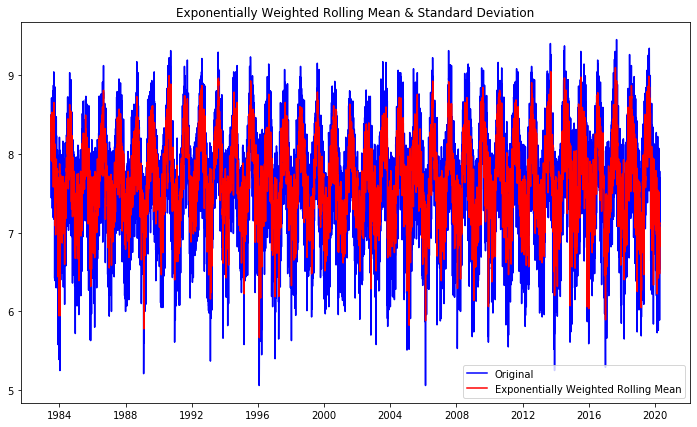

In [42]:
exp_roll_mean = pt_1_timeseries.ewm(halflife=2).mean()

# Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,7))
orig = plt.plot(pt_1_timeseries, color='blue',label='Original')
mean = plt.plot(exp_roll_mean, color='red', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.title('Exponentially Weighted Rolling Mean & Standard Deviation')
plt.show(block=False)

In [43]:
#differencing:one of the common techniques when dealing with both seasonality and trend
pt_1_timeseries_diff=pt_1_timeseries.diff(periods=1)

In [ ]:
#timeseriesdecomposition, another method to remove seasonality and trends 

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [45]:
pt_1_timeseries.head()

,ALLSKY_SFC_LW_DWN
Date,
1983-07-01,8.49
1983-07-02,8.15
1983-07-03,8.33
1983-07-04,8.34
1983-07-05,8.03


In [51]:
decomposition=seasonal_decompose(pt_1_timeseries['ALLSKY_SFC_LW_DWN'])

In [152]:
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(np.log(pt_1_timeseries))

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [93]:
#timeseriesmodeling

In [ ]:
We tried to analyse our time series data set in order to find patterns that help us make accurate predictions

In [ ]:
#basictimeseriesmodel

In [ ]:
#correlationandautocorrelation_series

In [156]:
pt_1_timeseries_diff =pt_1_timeseries.diff(periods=1)

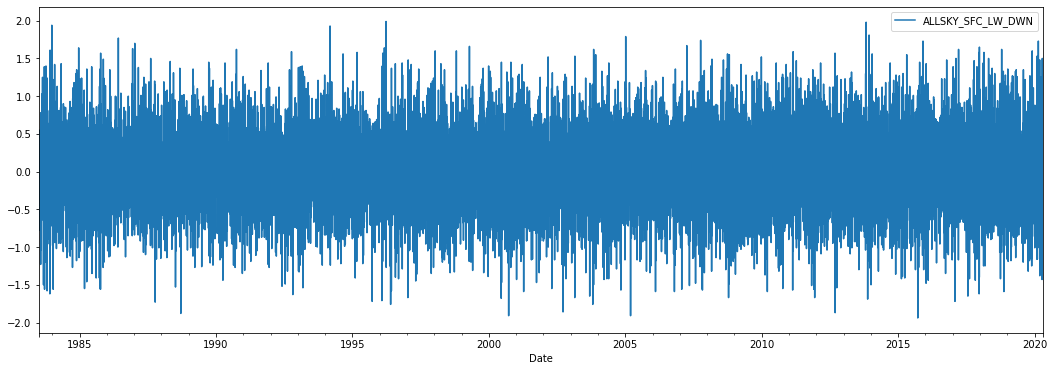

In [185]:
pt_1_timeseries_diff.plot(figsize=(18,6))

In [99]:
#autocorrelation
#lag-10-autocorrelation
pt_1_timeseries_lag_10=pt_1_timeseries.shift(10)
lag_10 = pd.concat([pt_1_timeseries,pt_1_timeseries_lag_10], axis=1)

lag_10.corr()

,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_LW_DWN
ALLSKY_SFC_LW_DWN,1.00000,-0.06915
ALLSKY_SFC_LW_DWN,-0.06915,1.00000


In [ ]:
it will be good to have the autocorrelation for each lag , that's exactly what autocorrelation fonction does

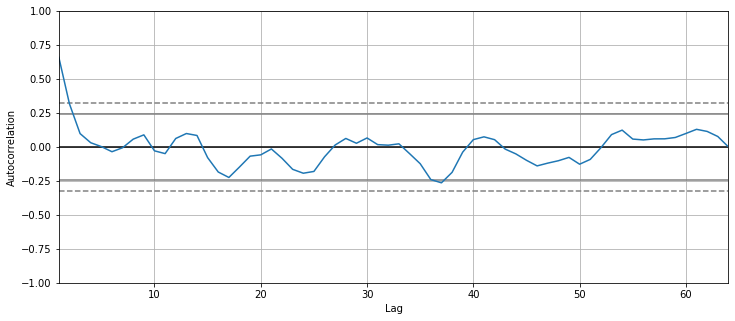

In [100]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(pt_1_timeseries)

In [ ]:
#The partial autocorrelation


In [28]:
pt_1_timeseries=pt_1_timeseries.asfreq('D')

In [29]:
# Import ARMA
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Instantiate an AR(1) model to the simulated data
mod_arma = ARMA(pt_1_timeseries, order=(1,0))

In [30]:
# Fit the model to data
res_arma = mod_arma.fit()

In [31]:
# Print out summary information on the fit
print(res_arma.summary())

                              ARMA Model Results                              
Dep. Variable:      ALLSKY_SFC_LW_DWN   No. Observations:                13440
Model:                     ARMA(1, 0)   Log Likelihood               -9055.447
Method:                       css-mle   S.D. of innovations              0.475
Date:                Tue, 28 Apr 2020   AIC                          18116.894
Time:                        21:25:17   BIC                          18139.412
Sample:                    07-01-1983   HQIC                         18124.406
                         - 04-16-2020                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       7.6649      0.013    575.217      0.000       7.639       7.691
ar.L1.ALLSKY_SFC_LW_DWN     0.6928      0.006    111.377      0.000       0.681       0.705


In [52]:
#These three distinct integer values, (p, d, q), are used to parametrize ARIMA models
p = d = q = range(0, 2)

In [ ]:
#We shall first generate small ranges of these parameters and use a "grid search" to iteratively explore different combinations of parameters.

In [53]:
# Generate all different combinations of p, q and q triplets
import itertools
pdq=list(itertools.product(p, d, q))

In [99]:
# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2],365) for x in list(itertools.product(p, d, q))]

In [ ]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        
            mod = sm.tsa.statespace.SARIMAX(pt_1_timeseries,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        
            

In [90]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])

In [91]:
ans_df.loc[ans_df['aic'].idxmin()]

pdq        (0, 0, 1)
pdqs    (1, 1, 1, 1)
aic          17141.2
Name: 15, dtype: object

The output of our code suggests that ARIMA(1, 1, 1)x(0,0,1, 12) yields the lowest AIC value of 17223.5. We should therefore consider this to be optimal option out of all the models we have considered.

Akaike Information Criterion:ich is provided by ARIMA models fitted using statsmodels library. The Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection.

A model that fits the data very well while using lots of features will be assigned a larger AIC score than a model that uses fewer features to achieve the same goodness-of-fit. Therefore, we are interested in finding the model that yields the lowest AIC value. To achieve this, perform following 

## Fitting an ARIMA Time Series Model
Using grid search, we have identified the set of parameters that produces the best fitting model to our time series data. We can proceed to analyze this particular model in more depth.

We'll start by plugging the optimal parameter values into a new SARIMAX model.

In [92]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(pt_1_timeseries, 
                                        order=(0, 0, 1), 
                                        seasonal_order=(1, 1, 1, 1), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1692      0.017      9.909      0.000       0.136       0.203
ar.S.L1        0.3607      0.018     20.012      0.000       0.325       0.396
ma.S.L1       -0.9345      0.004   -254.815      0.000      -0.942      -0.927
sigma2         0.2095      0.002     84.856      0.000       0.205       0.214


#Fitting an ARIMA Time Series Model:Using grid search, we have identified the set of parameters that produces the best fitting model to our time series data. We can proceed to analyze this particular model in more depth.
We'll start by plugging the optimal parameter values into a new SARIMAX model.

In [76]:
print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4928      0.009     57.355      0.000       0.476       0.510
ma.L1         -0.9427      0.003   -281.668      0.000      -0.949      -0.936
ar.S.L12    1.083e-05      0.002      0.005      0.996      -0.005       0.005
ma.S.L12      -0.9997      0.004   -224.032      0.000      -1.008      -0.991
sigma2         0.2103      0.003     80.905      0.000       0.205       0.215


The model returns a lot of information, but we'll focus only on the table of coefficients. The coef column above shows the importance of each feature and how each one impacts the time series patterns. The $P>|z|$ provides the significance of each feature weight.

For our time-series, we see that each weight has a p-value=0 but ma.S.L12, so it is to discussif it's a good idea  retain all of them in our model.



Next, we shall run model diagnostics to ensure that none of the assumptions made by the model have been violated.

Call the .plot_diagnostics() method on ARIMA output below:

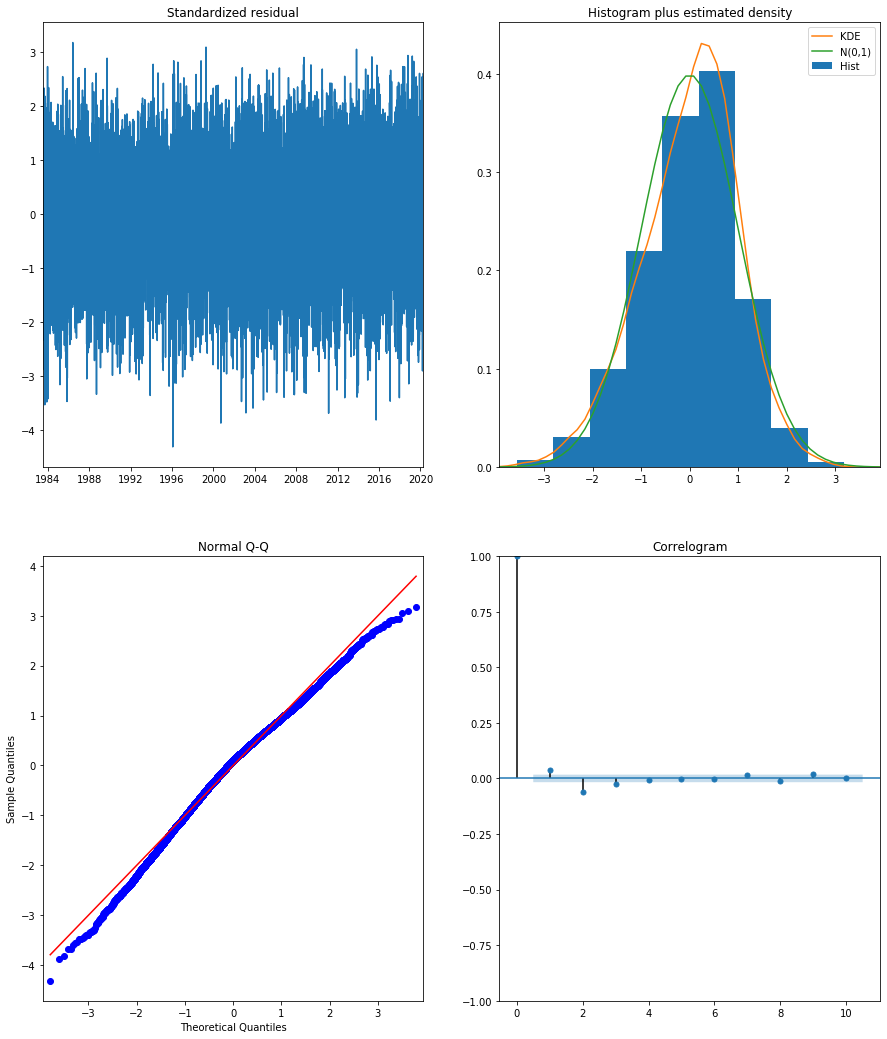

In [82]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

The purpose here is to ensure that residuals remain uncorrelated, normally distributed having zero mean. In the absence of these assumptions, we can not move forward and need further tweaking of the model.

Let's check for these assumptions from diagnostics plots.

In the top right plot, we see that the red KDE line follows closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is a good indication that the residuals are normally distributed.

The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.

The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

These observations lead us to conclude that our model has no correlations and provides a satisfactory fit to help forecast future values.

# Validating the Model

### One-step Ahead Forecasting
In order to validate the model, we start by comparing predicted values to real values of the time series, which will help us understand the accuracy of our forecasts.

The .get_prediction() and .conf_int() methods allow us to obtain the values and associated confidence intervals for forecasts of the time series.

For get_predictions(), set the dynamic parameter to False to ensure that we produce one-step ahead forecasts, meaning that forecasts at each point are generated using the full history up to that point

In [63]:
pt_1_timeseries.tail()

,ALLSKY_SFC_LW_DWN
Date,
2020-04-12,5.89
2020-04-13,6.28
2020-04-14,7.78
2020-04-15,7.77
2020-04-16,7.08


In [83]:
# Get predictions starting from 2020-04-24 and calculate confidence intervals
pred_one_step_ahead = output.get_prediction(start=pd.to_datetime('2020-02-01'), dynamic=False)
pred_conf = pred.conf_int()

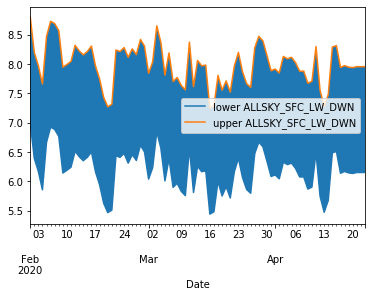

In [293]:
pred_conf.plot().fill_between(pred_conf.index,pred_conf.iloc[:,0],pred_conf.iloc[:,1],)

In [255]:
# Plot real vs predicted values along with confidence interval
rcParams['figure.figsize'] = 15, 6

NameError: name 'rcParams' is not defined

matplotlib.axes._subplots.AxesSubplot

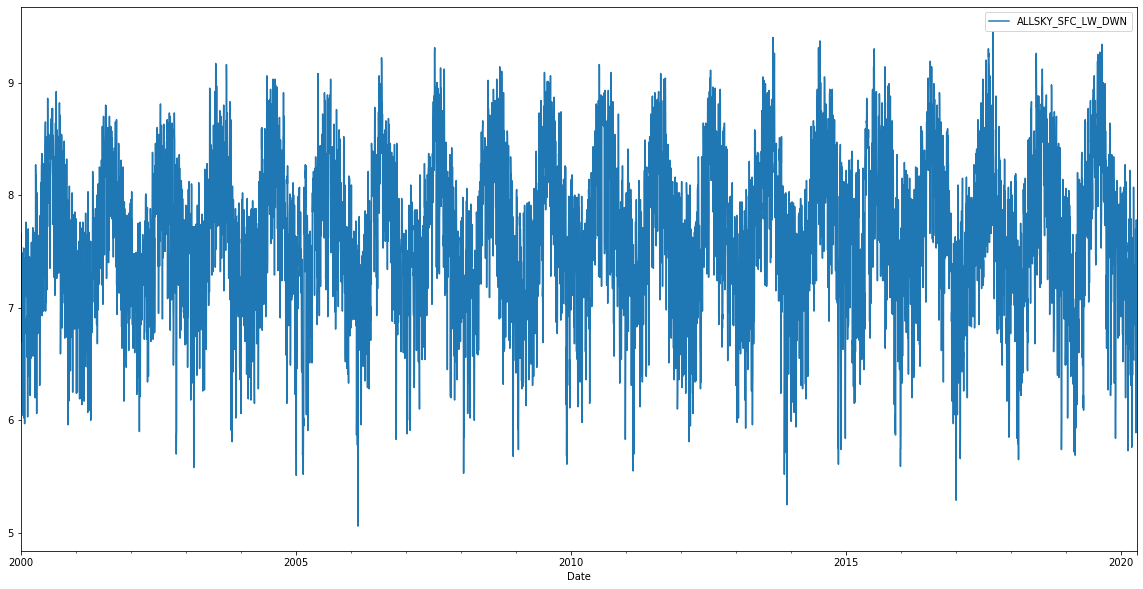

In [65]:
import matplotlib.pyplot
%matplotlib inline
type(pt_1_timeseries['2000':].plot(label='observed',figsize=(20,10)))

Matplotlib inline story:
Some people use matplotlib interactively from the python shell and have plotting windows pop up when they type commands. Some people run Jupyter notebooks and draw inline plots for quick data analysis. Others embed matplotlib into graphical user interfaces like wxpython or pygtk to build rich applications. Some people use matplotlib in batch scripts to generate postscript images from numerical simulations, and still others run web application servers to dynamically serve up graphs. To support all of these use cases, matplotlib can target different outputs, and each of these capabilities is called a backend; the "frontend" is the user facing code, i.e., the plotting code, whereas the "backend" does all the hard work behind-the-scenes to make the figure.

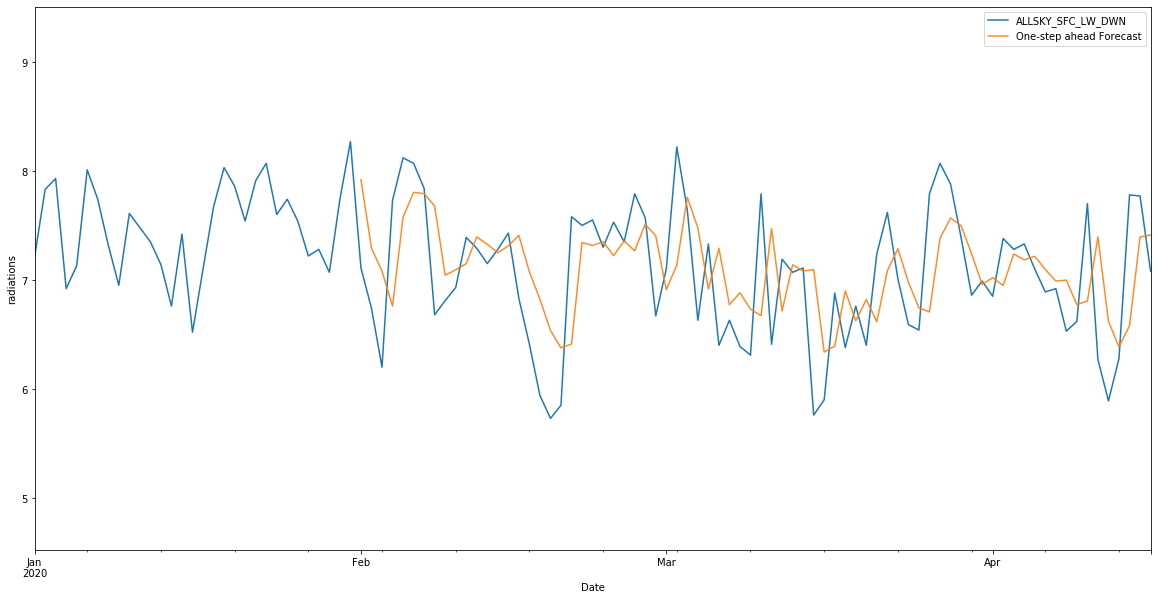

In [93]:
# Plot observed values
ax = pt_1_timeseries['2020':].plot(label='observed',figsize=(20,10))

# Plot predicted values
pred_one_step_ahead.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('radiations')
ax.legend()
ax.get_ylim
plt.show()

The forecasts align with the true values as seen above, with overall increase trend. We shall also check for the accuracy of our forecasts using MSE (Mean Squared Error). This will provide us with the average error of our forecasts. For each predicted value, we compute its distance to the true value and square the result. The results need to be squared so that positive/negative differences do not cancel each other out when we compute the overall mean.

In [71]:
# Get the real and predicted values
pt_1_timeseries_forecasted = pred.predicted_mean

In [73]:
pt_1_timeseries_truth = pt_1_timeseries['2020-02-01':]
np.array(pt_1_timeseries_truth)

array([[7.11],
       [6.74],
       [6.2 ],
       [7.73],
       [8.12],
       [8.07],
       [7.84],
       [6.68],
       [6.81],
       [6.93],
       [7.39],
       [7.29],
       [7.15],
       [7.28],
       [7.43],
       [6.83],
       [6.41],
       [5.94],
       [5.73],
       [5.85],
       [7.58],
       [7.5 ],
       [7.55],
       [7.3 ],
       [7.53],
       [7.35],
       [7.79],
       [7.57],
       [6.67],
       [7.1 ],
       [8.22],
       [7.64],
       [6.63],
       [7.33],
       [6.4 ],
       [6.63],
       [6.39],
       [6.31],
       [7.79],
       [6.41],
       [7.19],
       [7.07],
       [7.11],
       [5.76],
       [5.9 ],
       [6.88],
       [6.38],
       [6.76],
       [6.4 ],
       [7.24],
       [7.62],
       [7.01],
       [6.59],
       [6.54],
       [7.79],
       [8.07],
       [7.88],
       [7.39],
       [6.86],
       [6.99],
       [6.85],
       [7.38],
       [7.28],
       [7.33],
       [7.1 ],
       [6.89],
       [6.

In [74]:
# Compute the mean square error
mse = ((np.array(pt_1_timeseries_forecasted) - np.array(pt_1_timeseries_truth)) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.51


The MSE of our one-step ahead forecasts yields a value of 0.51, which is very low. An MSE this close to 0 indicates that the estimator is predicting observations of the parameter with perfect accuracy, which would be an ideal scenario but it is not typically possible.

### Dynamic forecasting

In [95]:
# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output.get_prediction(start=pd.to_datetime('2020-02-01'), dynamic=False, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

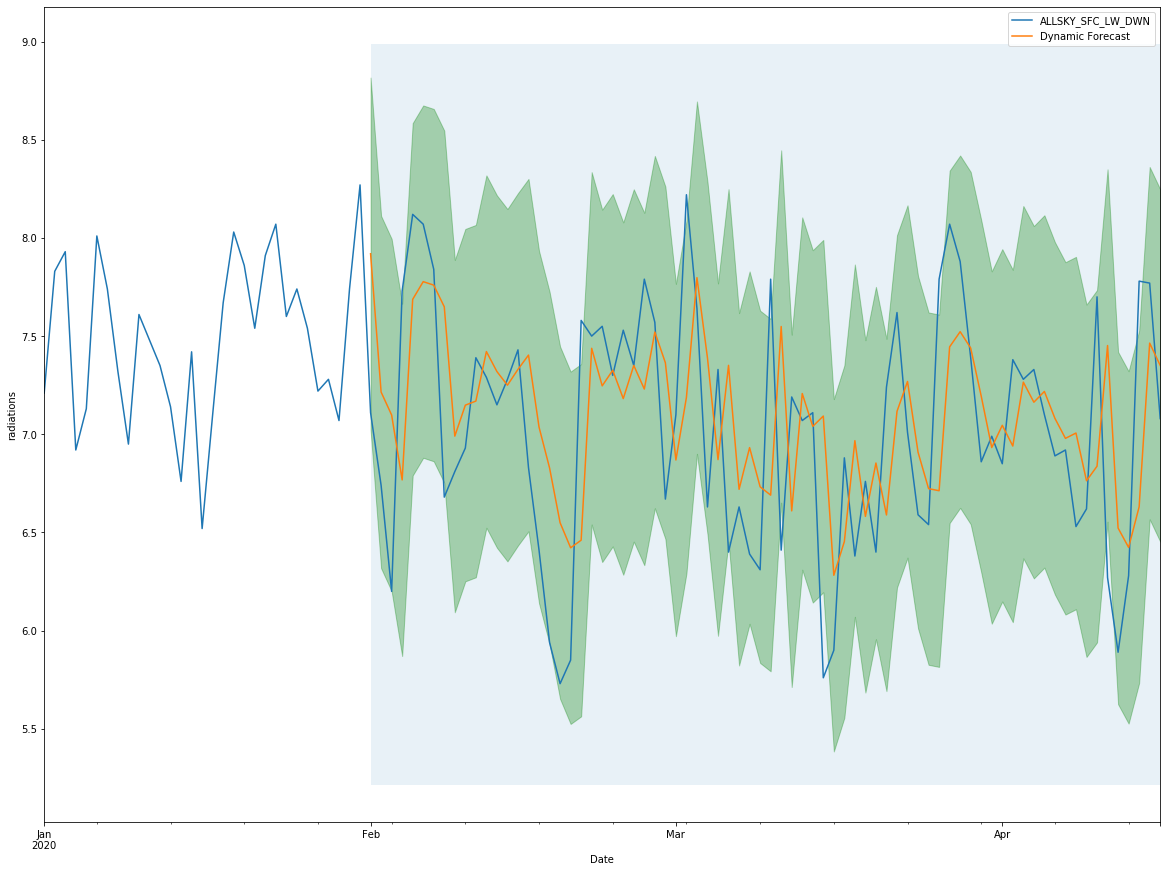

In [96]:
# Plot the dynamic forecast with confidence intervals.
pt_1_timeseries_forecasted = pred_dynamic.predicted_mean
ax = pt_1_timeseries['2020':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2020-02-01'), pt_1_timeseries_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('radiations')

plt.legend()
plt.show()

In [ ]:
Once again, we quantify the predictive performance of our forecasts by computing the MSE.

In [98]:
# Extract the predicted and true values of our time series
pt_1_timeseries_forecasted = pred_dynamic.predicted_mean
pt_1_timeseries_truth = pt_1_timeseries['2020-02-01':]
# Compute the mean square error
mse = ((np.array(pt_1_timeseries_forecasted) - np.array(pt_1_timeseries_truth)) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.66


The predicted values obtained from the dynamic forecasts yield an MSE of 1.01. This is slightly higher than the one-step ahead, which is to be expected given that we are relying on less historical data from the time series.

Both the one-step ahead and dynamic forecasts confirm that this time series model is valid. However, much of the interest around time series forecasting is the ability to forecast future values way ahead in time.

In [ ]:
#Producing and Visualizing Forecasts

We will now describe how to leverage our seasonal ARIMA time series model to forecast future values. The .get_forecast() method of our time series output can compute forecasted values for a specified number of steps ahead.

In [97]:
# Get forecast 500 steps ahead in future
prediction = output.get_forecast(steps=365,dynamic=False)
#prediction =output.get_prediction(start=pd.to_datetime('2020-02-01'),end='2020-09-01',dynamic=False, full_results=True)
# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

In [100]:
pt_1_timeseries['2020':]

,ALLSKY_SFC_LW_DWN
Date,
2020-01-01,7.21
2020-01-02,7.83
2020-01-03,7.93
2020-01-04,6.92
2020-01-05,7.13
...,...
2020-04-12,5.89
2020-04-13,6.28
2020-04-14,7.78


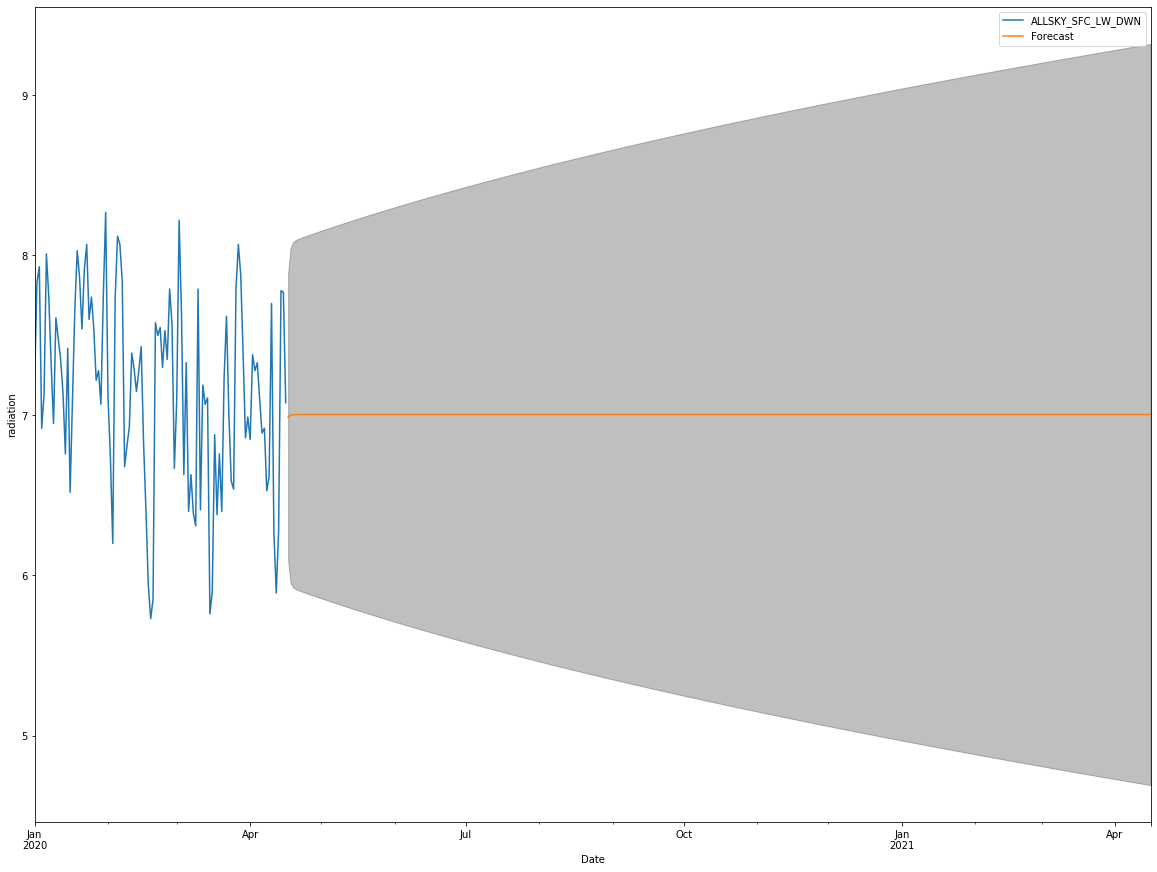

In [98]:
# Plot future predictions with confidence intervals
ax = pt_1_timeseries['2020':].plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('radiation')

plt.legend()
plt.show()

Both the forecasts and associated confidence interval that we have generated can now be used to further understand the time series and foresee what to expect. Our forecasts show that the time series is expected to continue increasing at a steady pace.

As we forecast further out into the future, it is natural for us to become less confident in our values. This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.

## Going through step by step

In [ ]:
Enter time series. A time series is simply a series of data points ordered in time. In a time series, time is often the independent variable and the goal is usually to make a forecast for the future.
However, there are other aspects that come into play when dealing with time series.
Is it stationary?
Is there a seasonality?
Is the target variable autocorrelated?

In [ ]:
n this post, I will introduce different characteristics of time series and how we can model them to obtain accurate (as much as possible) forecasts.

Autocorrelation
Informally, autocorrelation is the similarity between observations as a function of the time lag between them.

Seasonality
Seasonality refers to periodic fluctuations. For example, electricity consumption is high during the day and low during night, or online sales increase during Christmas before slowing down again.


Remember that seasonality can also be derived from an autocorrelation plot if it has a sinusoidal shape. Simply look at the period, and it gives the length of the season.

Stationarity
Ideally, we want to have a stationary time series for modelling. Of course, not all of them are stationary, but we can make different transformations to make them stationary.

How to test if a process is stationary
You may have noticed in the title of the plot above Dickey-Fuller. This is the statistical test that we run to determine if a time series is stationary or not.
Without going into the technicalities of the Dickey-Fuller test, it test the null hypothesis that a unit root is present.
If it is, then p > 0, and the process is not stationary.
Otherwise, p = 0, the null hypothesis is rejected, and the process is considered to be stationary.
As an example, the process below is not stationary. Notice how the mean is not constant through time.

In [ ]:
Modelling time series
Moving average
The moving average model is probably the most naive approach to time series modelling. This model simply states that the next observation is the mean of all past observations.
Although this model might be a good starting point.

In [ ]:
Otherwise, the moving average can be used to identify interesting trends in the data. We can define a window to apply the moving average model to smooth the time series, and highlight different trends.Of course, the longer the window, the smoother the trend will be. Below is an example of moving average on a smaller window.

In [ ]:
Exponential smoothing
Exponential smoothing uses a similar logic to moving average, but this time, a different decreasing weight is assigned to each observations. In other words, less importance is given to observations as we move further from the present.

In [ ]:
Here, alpha is a smoothing factor that takes values between 0 and 1. It determines how fast the weight decreases for previous observations.

In [ ]:
the smaller the smoothing factor, the smoother the time series will be. This makes sense, because as the smoothing factor approaches 0, we approach the moving average model.

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from tqdm import tqdm_notebook

from itertools import product

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

pt_1_timeseries.head(10)

,ALLSKY_SFC_LW_DWN
Date,
1983-07-01,8.49
1983-07-02,8.15
1983-07-03,8.33
1983-07-04,8.34
1983-07-05,8.03
1983-07-06,8.17
1983-07-07,7.99
1983-07-08,7.44
1983-07-09,7.99


In [ ]:
Moving average
Let’s use the moving average model to smooth our time series. For that, we will use a helper function that will run the moving average model on a specified time window and it will plot the result smoothed curve:

In [106]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

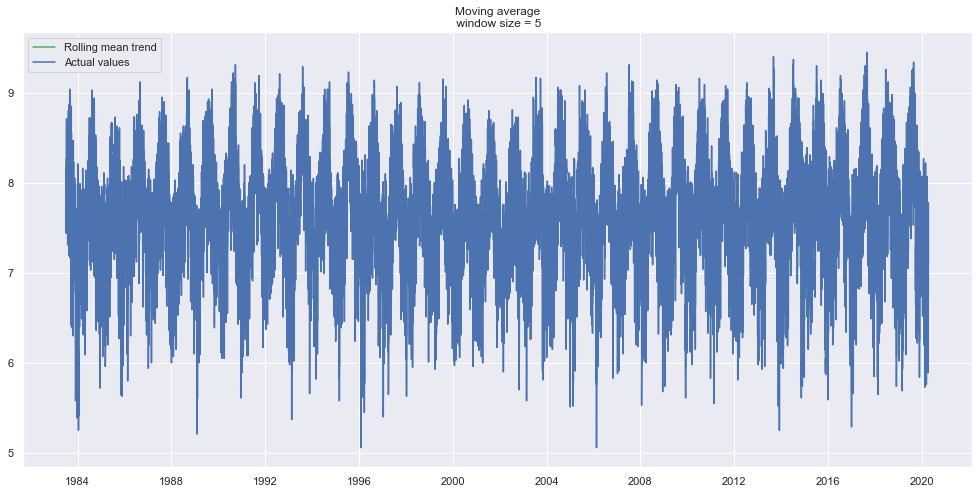

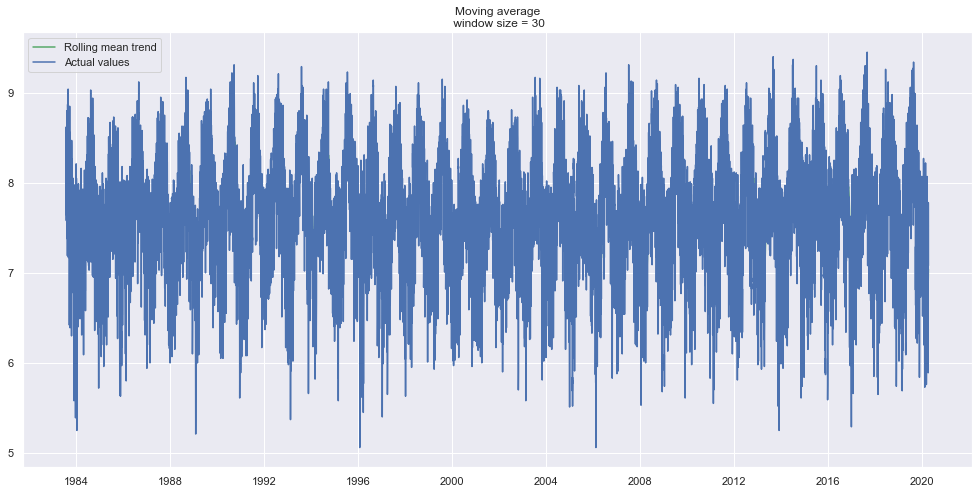

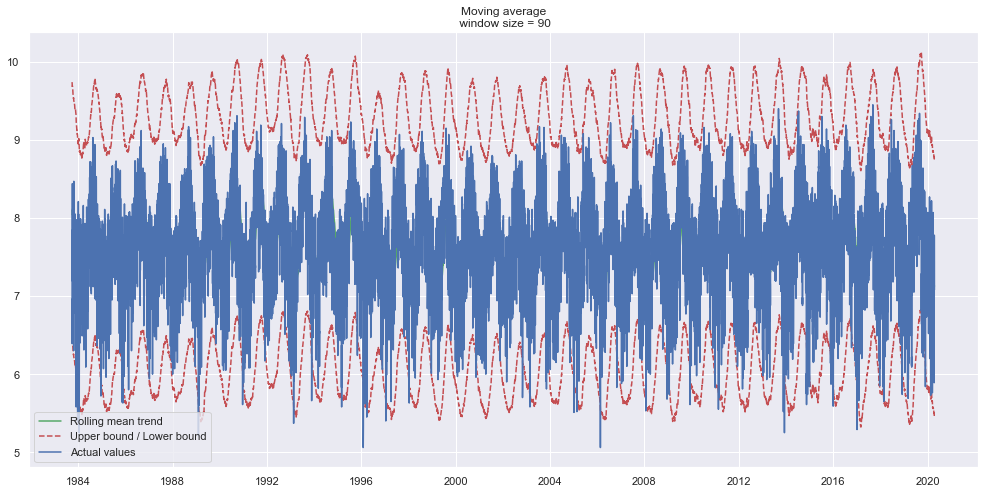

In [107]:
#Smooth by the previous 7 days (by week)
plot_moving_average(pt_1_timeseries, 5)

#Smooth by the previous month (30 days)
plot_moving_average(pt_1_timeseries, 30)

#Smooth by previous quarter (90 days)
plot_moving_average(pt_1_timeseries, 90, plot_intervals=True)

In [ ]:
#exponential smoothing

In [110]:
def exponential_smoothing(series, alpha):

    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result
  
def plot_exponential_smoothing(series, alphas):
 
    plt.figure(figsize=(20,10))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);

plot_exponential_smoothing(pt_1_timeseries, [0.05, 0.3])

KeyError: 0

<Figure size 1440x720 with 0 Axes>

In [ ]:
def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

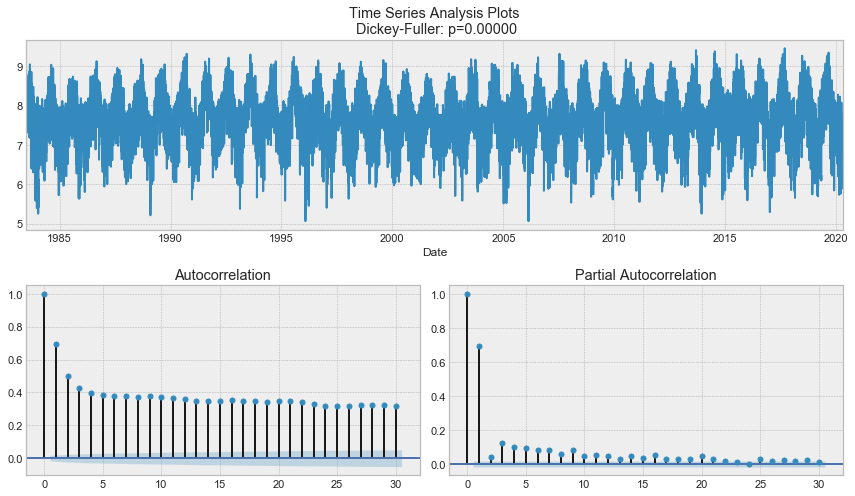

In [114]:
tsplot(pt_1_timeseries['ALLSKY_SFC_LW_DWN'],lags=30)

In [117]:
# Take the first difference to remove to make the process stationary
data_diff = pt_1_timeseries - pt_1_timeseries.shift(1)
data_diff

,ALLSKY_SFC_LW_DWN
Date,
1983-07-01,NaN
1983-07-02,-0.34
1983-07-03,0.18
1983-07-04,0.01
1983-07-05,-0.31
...,...
2020-04-12,-0.38
2020-04-13,0.39
2020-04-14,1.50


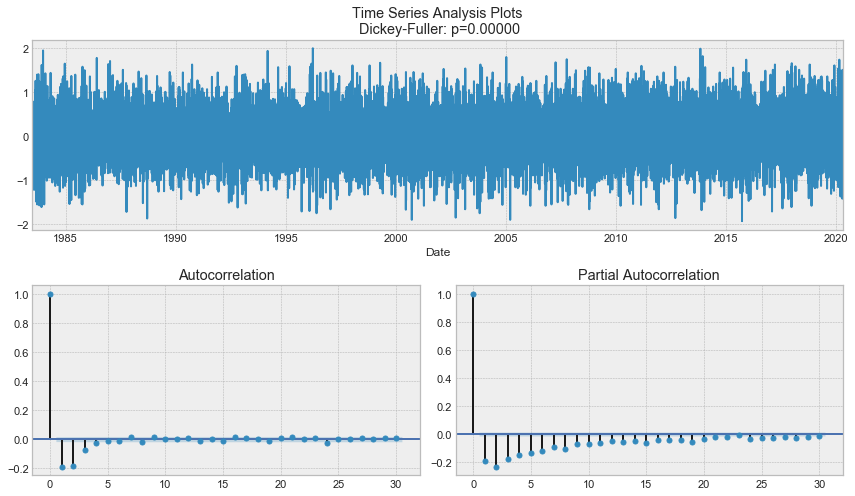

In [120]:
tsplot(data_diff['ALLSKY_SFC_LW_DWN'][1:], lags=30)

In [121]:
#Set initial values and some bounds
ps = range(0, 5)
d = 1
qs = range(0, 5)
Ps = range(0, 5)
D = 1
Qs = range(0, 5)
s = 5

In [122]:
#Create a list with all possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)


625

In [ ]:
#Train many SARIMA models to find the best set of parameters
def optimize_SARIMA(parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
    """
    
    results = []
    best_aic = float('inf')
    
    for param in tqdm_notebook(parameters_list):
        try: model = sm.tsa.statespace.SARIMAX(pt_1_timeseries['ALLSKY_SFC_LW_DWN'], order=(param[0], d, param[1]),
                                               seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        
        #Save best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])
        
    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    #Sort in ascending order, lower AIC is better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

In [ ]:
#Prophet
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as pl

In [ ]:

# Import Prophet
from fbprophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)

# Change the column names according to Prophet's guidelines
pt_.reset_index()
df.columns = ['ds', 'y']
df.head()

# Split into a train/test set
prediction_size = 30
train_df = df[:-prediction_size]

# Initialize and train a model
m = Prophet()
m.fit(train_df)

# Make predictions
future = m.make_future_dataframe(periods=prediction_size)
forecast = m.predict(future)
forecast.head()

# Plot forecast
m.plot(forecast)

# Plot forecast's components
m.plot_components(forecast)

# Evaluate the model
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

cmp_df = make_comparison_dataframe(df, forecast)
cmp_df.head()

In [341]:
pip install plotly

     |████████████████████████████████| 7.2MB 3.2MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-cp37-none-any.whl size=11429 sha256=bdb4cd58005bb5c44ef0d9c9d32a37ad92e505ad045b866f5f6d268b7470f69a
  Stored in directory: /Users/yasserelhari/Library/Caches/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [1]:
import plotly
# Authenticate with your account
plotly.tools.set_credentials_file(username='YasserEl',                                              
                                  api_key='Chicago2019@')

AttributeError: module 'plotly.tools' has no attribute 'set_credentials_file'